In [1]:
# load libs:
from __future__ import division
from __future__ import print_function
import csv
import numpy as np
from math import *
import scipy.stats as stats
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
# load data:
with open('stroopdata.csv', 'rb') as f:
    reader = csv.reader(f, delimiter = ',')
    # skip headers
    reader.next()

    # init congruent and incongruent arrays:
    congruent = []
    incongruent = []
    for row in reader:
        congruent.append(float(row[0]))
        incongruent.append(float(row[1]))
    # done
congruent = np.array(congruent)
congruent.sort()
incongruent = np.array(incongruent)
incongruent.sort()
print(congruent)
print(len(congruent))
print(incongruent)

[  8.63    8.987   9.401   9.564  10.639  11.344  12.079  12.13   12.238
  12.369  12.944  14.233  14.48   14.669  14.692  15.073  15.298  16.004
  16.791  16.929  18.2    18.495  19.71   22.328]
24
[ 15.687  17.394  17.425  17.51   17.96   18.644  18.741  19.278  20.33
  20.429  20.762  20.878  21.157  21.214  22.058  22.158  22.803  23.894
  24.524  24.572  25.139  26.282  34.288  35.255]


In [3]:
# get some descriptive stats:

muu_con = np.mean(congruent)
muu_incon = np.mean(incongruent)

median_con = congruent[len(congruent)/2]
median_incon = incongruent[len(incongruent)/2]
var_con = np.var(congruent)
var_incon = np.var(incongruent)

std_con = sqrt(var_con)
std_incon = sqrt(var_incon)
print('Means:')
print('%.4f' % muu_con + ', ' + '%.4f' % muu_incon)
print('Medians:')
print('%.4f' % median_con + ', ' + '%.4f' % median_incon)
print('Variances:')
print('%.4f' % var_con + ', ' + '%.4f' % var_incon)
print('STD\'s:')
print('%.4f' % std_con + ', ' + '%.4f' % std_incon)

Means:
14.0511, 22.0159
Medians:
14.4800, 21.1570
Variances:
12.1412, 22.0529
STD's:
3.4844, 4.6961


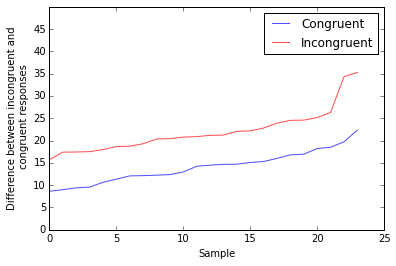

In [4]:
# visualize distributions:

# Stackplot of congruent and incongruent datasets,
# a good way to visualize the differences between them
x = np.arange(24)
y1 = incongruent
y2 = congruent

plt.plot(x, y2, alpha=0.7, color='blue', label='Congruent')
plt.plot(x, y1, alpha=0.7, color='red', label='Incongruent')
plt.xlabel('Sample')
plt.ylabel('Difference between incongruent and\n congruent responses')
plt.ylim(0,50)
plt.yticks(np.arange(0, 50, 5))
plt.legend()
plt.show()

In [5]:
# run t-test on the samples

alpha = 0.95

# Use Welch since variances are inequal
t, p = stats.ttest_ind(congruent, incongruent, equal_var=False)

print(t,p)

-6.5322505539 6.51016739044e-08
